<a href="https://colab.research.google.com/github/felipeescorel/VMLampiao/blob/master/LampiaoClienteFinal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from keras import optimizers

from keras.models import Sequential
from keras.regularizers import l2
from keras.layers.core import Dense, Dropout



In [5]:
!git clone https://github.com/felipeescorel/redes_neurais.git

Cloning into 'redes_neurais'...
remote: Enumerating objects: 8, done.
remote: Counting objects: 100% (8/8), done.
remote: Compressing objects: 100% (8/8), done.
remote: Total 202 (delta 3), reused 0 (delta 0), pack-reused 194
Receiving objects: 100% (202/202), 34.91 MiB | 33.44 MiB/s, done.
Resolving deltas: 100% (59/59), done.


In [0]:
data =  pd.read_csv('redes_neurais/ClientesVM/datasetV6.csv')

In [0]:
def instance_model():
      model = Sequential()
      model.add(Dense(64,input_dim=input_dim,
                  activation ='relu',
                  kernel_initializer='random_uniform',
                  #bias_initializer='zeros',
                  kernel_regularizer=l2(1e-4),
                  bias_regularizer=l2(1e-4),))
      model.add(Dropout(rate=0.15))
      model.add(Dense(128,activation='relu',
                  kernel_initializer='random_uniform',
                  #bias_initializer='zeros',
                  kernel_regularizer=l2(1e-4),
                  bias_regularizer=l2(1e-4),))
      model.add(Dropout(rate=0.15))
      model.add(Dense(128,activation='relu',
                  kernel_initializer='random_uniform',
                  #bias_initializer='zeros',
                  kernel_regularizer=l2(1e-4),
                  bias_regularizer=l2(1e-4),))
      model.add(Dropout(rate=0.15))
      model.add(Dense(1, activation='sigmoid',
                  kernel_initializer='random_uniform',
                  #bias_initializer='zeros',
                  kernel_regularizer=l2(1e-4),
                  bias_regularizer=l2(1e-4),))
      return model

# Normalização de colunas com valores discrepantes  

x = (x - min)/(max -min)

In [0]:
data['rendaMedia'] = data['rendaMedia'].map(lambda x: (x - data['rendaMedia'].min())/(data['rendaMedia'].max()-data['rendaMedia'].min()) )

In [0]:
data['cidade_id'] = data['cidade_id'].map(lambda x: (x - data['cidade_id'].min())/(data['cidade_id'].max()-data['cidade_id'].min()) ) 

In [0]:
data['Idade'] = data['Idade'].map(lambda x: (x - data['Idade'].min())/(data['Idade'].max()-data['Idade'].min()) )

# Separando conjuntos de treino e teste

> 80% treino, 20% teste



In [0]:
train, test = train_test_split(data, test_size=0.2)
labels = train.loc[:,'id']
X_train = train.iloc[:,1:-1]
y_train = train.loc[:,'Aprovado']
X_test = test.iloc[:,1:-1]
y_test = test.loc[:,'Aprovado']

In [0]:
input_dim = X_train.shape[1]
epochs = 400
model = instance_model()
adam = optimizers.Adam(lr=0.0001)
model.compile(loss='binary_crossentropy', optimizer=adam ,metrics=['accuracy'])

# Testes

In [0]:
print("Training...")
history = model.fit(X_train,y_train, epochs=epochs, batch_size=32, validation_split=0.15, verbose=2, shuffle = True)


In [17]:
score = model.evaluate(X_test,y_test,64)
print(score[1])

2800/2800 [==============================] - 0s 18us/step
0.6660714282308307


# Learning Rate 0,0001 - Adam,  Nadam, Adamax


<function matplotlib.pyplot.show>

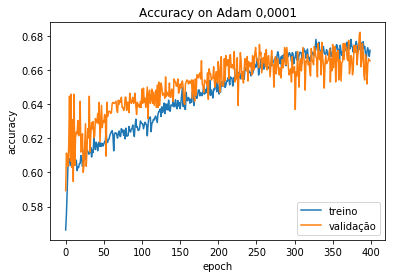

In [18]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Accuracy on Adam 0,0001')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['treino','validação'],loc='lower right')
plt.show

<function matplotlib.pyplot.show>

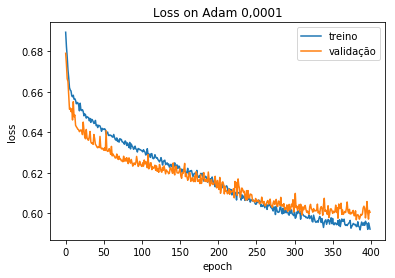

In [20]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss on Adam 0,0001')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['treino','validação'],loc='upper right')
plt.show

In [0]:
model = instance_model()
adam = optimizers.Nadam(lr=0.0001)
model.compile(loss='binary_crossentropy', optimizer=adam ,metrics=['accuracy'])

In [0]:
history2 = model.fit(X_train,y_train, epochs=epochs, batch_size=32, validation_split=0.15, verbose=2, shuffle = True)


In [0]:
score = model.evaluate(X_test,y_test)
print(score[1])

<function matplotlib.pyplot.show>

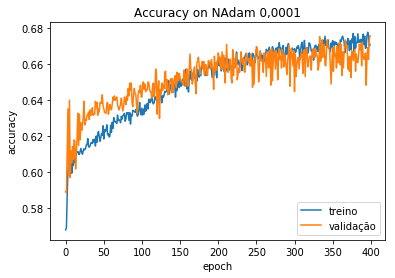

In [68]:
plt.plot(history2.history['acc'])
plt.plot(history2.history['val_acc'])
plt.title('Accuracy on NAdam 0,0001')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['treino','validação'],loc='lower right')
plt.show

<function matplotlib.pyplot.show>

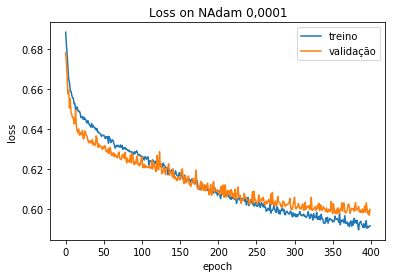

In [26]:
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('Loss on NAdam 0,0001')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['treino','validação'],loc='upper right')
plt.show

In [0]:
model = instance_model()
adam = optimizers.Adamax(lr=0.0001)
model.compile(loss='binary_crossentropy', optimizer=adam ,metrics=['accuracy'])

In [0]:
history3 = model.fit(X_train,y_train, epochs=epochs, batch_size=32, validation_split=0.15, verbose=2, shuffle = True)


In [30]:
score = model.evaluate(X_test,y_test)
print(score[1])

2800/2800 [==============================] - 0s 28us/step
0.6460714285714285


<function matplotlib.pyplot.show>

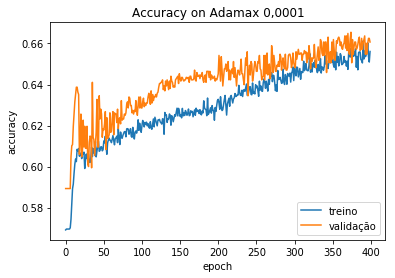

In [31]:
plt.plot(history3.history['acc'])
plt.plot(history3.history['val_acc'])
plt.title('Accuracy on Adamax 0,0001')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['treino','validação'],loc='lower right')
plt.show

<function matplotlib.pyplot.show>

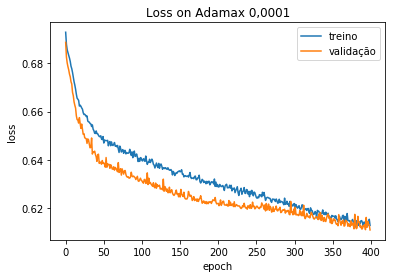

In [32]:
plt.plot(history3.history['loss'])
plt.plot(history3.history['val_loss'])
plt.title('Loss on Adamax 0,0001')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['treino','validação'],loc='upper right')
plt.show

<function matplotlib.pyplot.show>

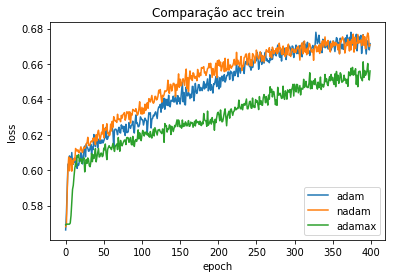

In [35]:
plt.plot(history.history['acc'])
plt.plot(history2.history['acc'])
plt.plot(history3.history['acc'])
# plt.plot(history4.history['acc'])


plt.title('Comparação acc trein')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['adam','nadam','adamax'],loc='lower right')
plt.show

<function matplotlib.pyplot.show>

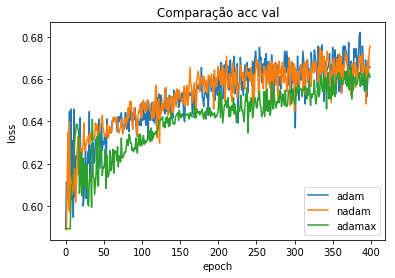

In [37]:
plt.plot(history.history['val_acc'])
plt.plot(history2.history['val_acc'])
plt.plot(history3.history['val_acc'])
# plt.plot(history4.history['val_acc'])


plt.title('Comparação acc val')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['adam','nadam','adamax'],loc='lower right')
plt.show

<function matplotlib.pyplot.show>

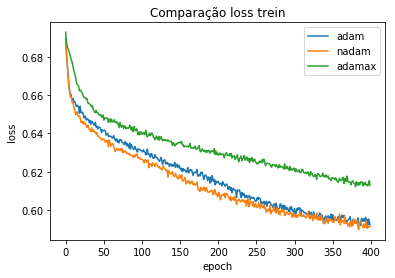

In [38]:
plt.plot(history.history['loss'])
plt.plot(history2.history['loss'])
plt.plot(history3.history['loss'])
# plt.plot(history4.history['loss'])

plt.title('Comparação loss trein')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['adam','nadam','adamax'],loc='upper right')
plt.show

<function matplotlib.pyplot.show>

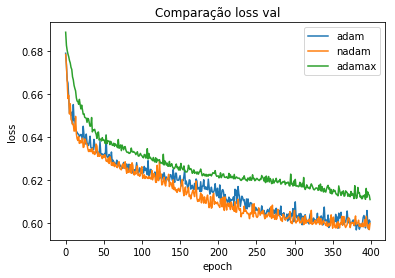

In [39]:
plt.plot(history.history['val_loss'])
plt.plot(history2.history['val_loss'])
plt.plot(history3.history['val_loss'])
# plt.plot(history4.history['val_loss'])


plt.title('Comparação loss val')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['adam','nadam','adamax'],loc='upper right')
plt.show

# Learning rate 0.0002 , 0.0005, 0.00001 on Adam, NAdam

In [0]:
model = instance_model()
adam = optimizers.Adam(lr=0.0002)
model.compile(loss='binary_crossentropy', optimizer=adam ,metrics=['accuracy'])
history4 = model.fit(X_train,y_train, epochs=epochs, batch_size=32, validation_split=0.15, verbose=2, shuffle = True)
score = model.evaluate(X_test,y_test)
print(score[1])


In [0]:
model = instance_model()
adam = optimizers.Nadam(lr=0.0002)
model.compile(loss='binary_crossentropy', optimizer=adam ,metrics=['accuracy'])
history5 = model.fit(X_train,y_train, epochs=epochs, batch_size=32, validation_split=0.15, verbose=2, shuffle = True)
score = model.evaluate(X_test,y_test)
print(score[1])


In [0]:
model = instance_model()
adam = optimizers.Adam(lr=0.0005)
model.compile(loss='binary_crossentropy', optimizer=adam ,metrics=['accuracy'])
history6 = model.fit(X_train,y_train, epochs=epochs, batch_size=32, validation_split=0.15, verbose=2, shuffle = True)
score = model.evaluate(X_test,y_test)
print(score[1])


In [0]:
model = instance_model()
adam = optimizers.Nadam(lr=0.0005)
model.compile(loss='binary_crossentropy', optimizer=adam ,metrics=['accuracy'])
history7 = model.fit(X_train,y_train, epochs=epochs, batch_size=32, validation_split=0.15, verbose=2, shuffle = True)
score = model.evaluate(X_test,y_test)
print(score[1])


In [0]:
model = instance_model()
adam = optimizers.Adam(lr=0.00001)
model.compile(loss='binary_crossentropy', optimizer=adam ,metrics=['accuracy'])
history8 = model.fit(X_train,y_train, epochs=epochs, batch_size=32, validation_split=0.15, verbose=2, shuffle = True)
score = model.evaluate(X_test,y_test)
print(score[1])


In [0]:
model = instance_model()
adam = optimizers.Nadam(lr=0.00001)
model.compile(loss='binary_crossentropy', optimizer=adam ,metrics=['accuracy'])
history9 = model.fit(X_train,y_train, epochs=epochs, batch_size=32, validation_split=0.15, verbose=2, shuffle = True)
score = model.evaluate(X_test,y_test)
print(score[1])


<function matplotlib.pyplot.show>

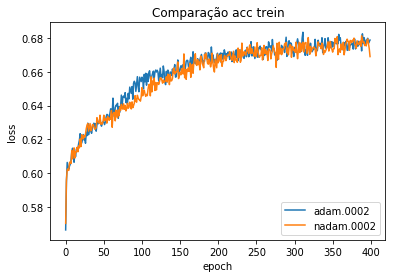

In [52]:
plt.plot(history4.history['acc'])
plt.plot(history5.history['acc'])

plt.title('Comparação acc trein')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['adam.0002','nadam.0002'],loc='lower right')
plt.show

<function matplotlib.pyplot.show>

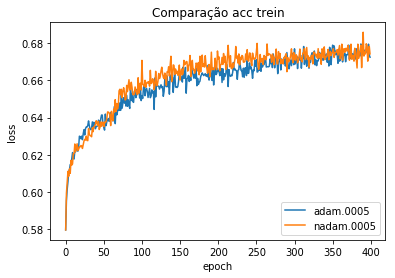

In [53]:
plt.plot(history6.history['acc'])
plt.plot(history7.history['acc'])


plt.title('Comparação acc trein')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['adam.0005','nadam.0005'],loc='lower right')
plt.show

<function matplotlib.pyplot.show>

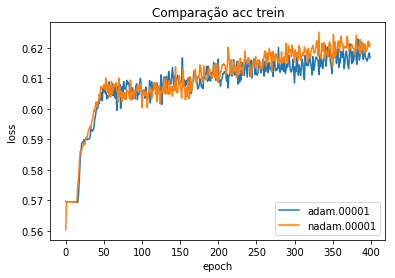

In [54]:
plt.plot(history8.history['acc'])
plt.plot(history9.history['acc'])


plt.title('Comparação acc trein')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['adam.00001','nadam.00001'],loc='lower right')
plt.show

<function matplotlib.pyplot.show>

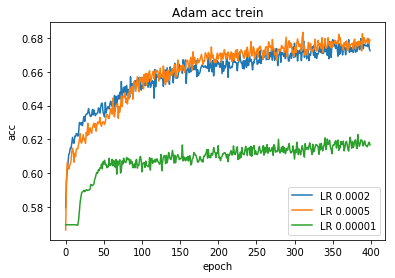

In [80]:

plt.plot(history6.history['acc'])
plt.plot(history4.history['acc'])
plt.plot(history8.history['acc'])


plt.title('Adam acc trein')
plt.ylabel('acc')
plt.xlabel('epoch')
plt.legend(['LR 0.0002','LR 0.0005','LR 0.00001'],loc='lower right')
plt.show

<function matplotlib.pyplot.show>

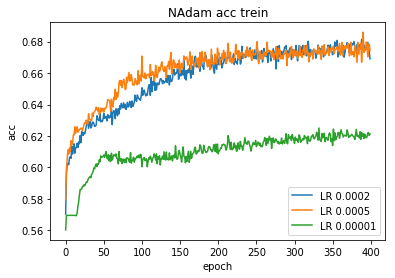

In [78]:

plt.plot(history5.history['acc'])
plt.plot(history7.history['acc'])
plt.plot(history9.history['acc'])


plt.title('NAdam acc trein')
plt.ylabel('acc')
plt.xlabel('epoch')
plt.legend(['LR 0.0002','LR 0.0005','LR 0.00001'],loc='lower right')
plt.show

<function matplotlib.pyplot.show>

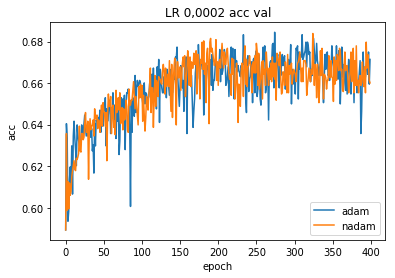

In [77]:
plt.plot(history4.history['val_acc'])
plt.plot(history5.history['val_acc'])

plt.title('LR 0,0002 acc val')
plt.ylabel('acc')
plt.xlabel('epoch')
plt.legend(['adam','nadam'],loc='lower right')
plt.show


<function matplotlib.pyplot.show>

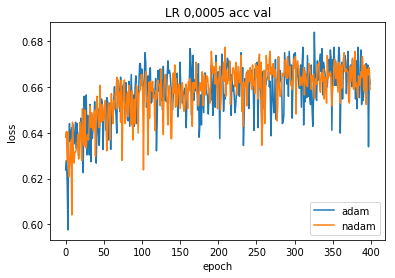

In [76]:
plt.plot(history6.history['val_acc'])
plt.plot(history7.history['val_acc'])


plt.title('LR 0,0005 acc val')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['adam','nadam'],loc='lower right')
plt.show

<function matplotlib.pyplot.show>

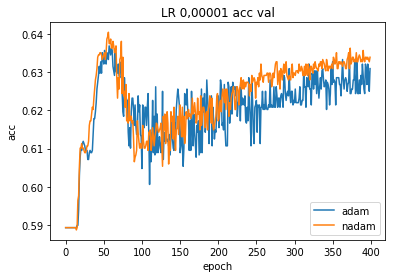

In [81]:
plt.plot(history8.history['val_acc'])
plt.plot(history9.history['val_acc'])


plt.title('LR 0,00001 acc val')
plt.ylabel('acc')
plt.xlabel('epoch')
plt.legend(['adam','nadam'],loc='lower right')
plt.show

<function matplotlib.pyplot.show>

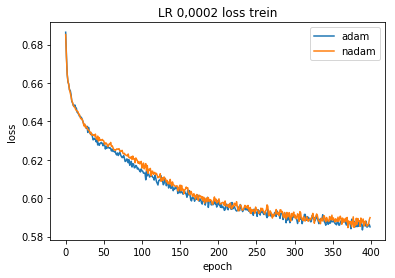

In [82]:
plt.plot(history4.history['loss'])
plt.plot(history5.history['loss'])

plt.title('LR 0,0002 loss trein')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['adam','nadam'],loc='upper right')
plt.show

<function matplotlib.pyplot.show>

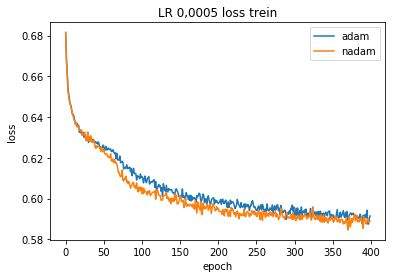

In [83]:

plt.plot(history6.history['loss'])
plt.plot(history7.history['loss'])
plt.title('LR 0,0005 loss trein')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['adam','nadam'],loc='upper right')
plt.show

<function matplotlib.pyplot.show>

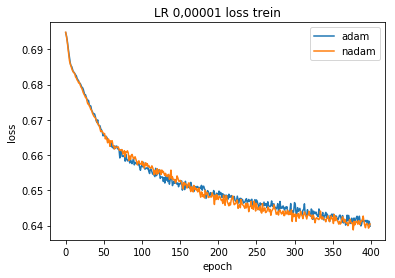

In [84]:

plt.plot(history8.history['loss'])
plt.plot(history9.history['loss'])
plt.title('LR 0,00001 loss trein')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['adam','nadam'],loc='upper right')
plt.show

<function matplotlib.pyplot.show>

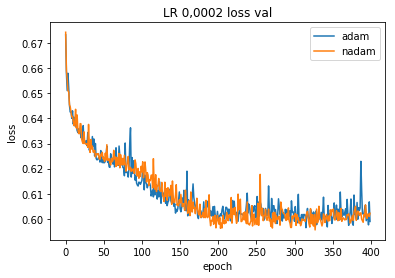

In [85]:
plt.plot(history4.history['val_loss'])
plt.plot(history5.history['val_loss'])



plt.title('LR 0,0002 loss val')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['adam','nadam'],loc='upper right')
plt.show

<function matplotlib.pyplot.show>

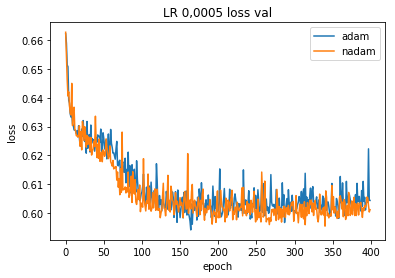

In [86]:

plt.plot(history6.history['val_loss'])
plt.plot(history7.history['val_loss'])
plt.title('LR 0,0005 loss val')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['adam','nadam'],loc='upper right')
plt.show

<function matplotlib.pyplot.show>

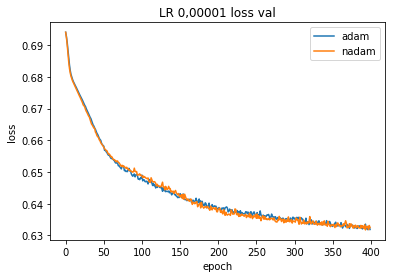

In [87]:
plt.plot(history8.history['val_loss'])
plt.plot(history9.history['val_loss'])
plt.title('LR 0,00001 loss val')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['adam','nadam'],loc='upper right')
plt.show